# Partie théorique

Ce projet d'optimisation a été réalisé par Elise Costa et Thomas Dubard, dans le Groupe 1 pour les PC d'optimisation.

## Notations et modélisation du problème

![Figuré 1 - Notations](Notation.png)

 $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \$**Figuré 1 - Notations**

On note $\color{red} {T}$ l'instant présent auquel on est en train de faire les calculs.

A l'instant $T$, il y a $\color{red} {N(T)}$ voitures en chargement numérotées par des indices $\color{red} {j}$.

On note $\color{red} {t_{j,0}}$ le moment où arrive la voiture $j$ et $\color{red} {t_{j,f}}$ celui où elle part. On note $\color{red} {SOC_{j,0}}$ le pourcentage de charge de la voiture $j$ au moment où elle arrive (charge relative) et $\color{red} {SOC_{j,f}}$ celui qu'elle devra avoir atteint. En notant $\color{red} {e_{j,max}}$ la charge maximale de la voiture $j$ (charge absolue), on a $ \color{red} {e_{j,0}} = e_{j,max}SOC_{j,0}$ et $\color{red} { e_{j,f} }= e_{j,max}SOC_{j,f}$ avec $e_{j,0}$ l'état initial de charge de la voiture et $e_{j,f}$ l'état final de charge voulu par l'utilisateur.


On note $\color{red} {e_j(T)}$ l'état réel de charge de la voiture $j$ à l'instant $T$.

Il y a $\color{red} {n}$ chargeurs numérotés par des indices $\color{red} {k}$.

On introduit  $\color{red} {U}$ la tension secteur. En France, $U = 230 V$.

On note $\color{red} {I_k(T)}$ l'intensité que délivre le $k$-ième chargeur à l'instant $T$.

On note $\color{red} {I_{totale}(T)}$ l'intensité totale délivrée par tous les chargeurs de la station à l'instant $T$, c'est-à-dire l'intensité qui parcourt le câble directement issu du système d'ordonnancement.

On note $\color{red} {P_k(T)}$ la puissance délivrée par la borne $k$ à l'instant $T$ (physiquement cela revient à la puissance reçue par le système borne-batterie, donc $P_k = U * I_k$ en convention récepteur, et l'opposé en convention générateur i.e. si la borne va au contraire puiser de l'énergie dans la batterie de la voiture) et $\color{red} {P_{totale}(T)}$ celle délivrée par le système d'ordonnancement à l'ensemble des bornes. On note $\color{red} {P_{max}}$ la puissance maximale supportée par le réseau.

Remarques :
1. Ici l'exemple ci-dessus était simple, mais comme les chargeurs et les voitures sont indicés différemment (afin de gérer le changement constant du parc de voiture en cours de recharge), il est important d'inclure un critère reliant ces deux quantités.
1. Ici on note $P_{max}$ la puissance maximale supportée par le réseau. Elle regroupe la puissance maximale que l'on peut raisonnablement puiser dans le réseau (il faut une offre électrique suffisante), mais aussi la puissance maximale supportée par les éléments du système (il faut éviter la surchauffedes câbles, batteries, chargeurs, ...). Si besoin, on pourrait distinguer ces deux notions.

![Figuré 2 - Exemple](Example.png)

 $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \$**Figuré 2 - Exemple**

Ici la voiture 3 branchée sur le chargeur 3 se décharge afin de fournir aux deux autres couples voitures-chargeurs de la puissance supplémentaire $- P_3$, en plus de $P_{tot}$ prélevée dans le réseau par le système d'ordonnancement. Ainsi toutes les puissances sont en convention récepteur, sauf pour le système 3 qui en convention générateur fournit de la puissance au reste, d'où $P_3 = - \ U * I_3$.

## Q.1

![Figuré 1 - Exemple d'état de flottes à une station de recharge](Figure1.png)

 $ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \$**Figuré 3 - Exemple d'état de flottes à une station de recharge**

On pose $C$ la fonction de coût de l'électricté en $Euro/Wh$ définie par $C(T) =\left\{
\begin{array}{l}
  c_{creux} \ si \ T \ est \ pendant \ les \ heures \ creuses\\
  c_{plein} \ sinon
\end{array}
\right.$

avec $c_{creux}$ et $c_{plein}$ des constantes positives.

La fonction de prix de l'électricité consommée par l'ensemble de la station $p$ est donc définie par $p(T) =  \int_{0}^{T} C(t)P_{totale}(t) \, \mathrm{d}t $.

Or : $P_{totale}(T) = UI_{totale}(T)$ à chaque instant T.

Comme $U$ est une constante strictement positive, on s'intéresse à minimiser la fonction $\tilde{p}$ définie par $\tilde{p}(T) =  \int_{0}^{T} C(t)I_{totale}(t) \, \mathrm{d}t $.

Or la loi des noeuds donne : $ I_{totale}(T) = \sum \limits_{{k=1}}^n I_k(T)$ à chaque instant $T$, d'après le figuré 1 ci-dessus.

Ainsi, $\tilde{p}(T) =  \int_{0}^{T} C(t)\sum \limits_{{k=1}}^n I_k(t) \, \mathrm{d}t $.


## Q.2

Une charge peut s'exprimer en $A.h$.

Supposons que la voiture $j$ soit en train de charger au $k$-ième chargeur.

On a : $ e_{j}(t_{j,f}) - e_{j,0} =  \int_{t_{j,0}}^{t_{j,f}} I_k(t) \, \mathrm{d}t = e_{j,f} - e_{j,0}$ si la voiture a bien été chargée.

Plus précisément : $\forall  T \in [t_{j,0},t_{j,f}], e_{j}(T) - e_{j,0} =  \int_{t_{j,f}}^{T} I_k(t) \, \mathrm{d}t$

## Q.3

On cherche à prouver le modèle ci-dessus en comparant l'intégrale temporelle de l'intensité et la charge.

In [4]:
import matplotlib.pyplot as plt

texte = open('donnees-projet-gr1.txt', 'r')
temps = []
intensité = []
charge = []

for ligne in texte:
    swap = ligne.split()
    temps.append(float(swap[0]))
    intensité.append(float(swap[1]))
    charge.append(float(swap[2]))

intagreg = [charge[0]]
n = len(temps)

for k in range(1, n):
    h = intensité[k] + intensité[k - 1]
    b = temps[k] - temps[k - 1]
    intagreg.append((h * b / 2) + intagreg[-1])

plt.plot(charge, intagreg, color='blue')
plt.show()

<Figure size 640x480 with 1 Axes>

La charge (relative) donnée et celle qui vient d'être calculée (absolue) semblent être liées par une relation affine. On va donc chercher à calculer les deux coefficients caractéristiques (le coefficient directeur $a$ et l'ordonnée à l'origine $b$) de cette relation affine. $a$ représente alors la charge absolue maximale de la batterie.

On implémente une méthode de régression linéaire :

In [5]:
#CCalcul de l'esperance d'une liste de valeurs
def esperance(X):
    s = 0
    N = len(X)
    for x in X:
        s += x
    return s / N

#Calcul de la variance d'une liste de valeurs
def variance(X):
    X2 = [x**2 for x in X]
    return esperance(X2) - (esperance(X)**2)

#Calcul de la covariance de deux listes de valeurs de meme taille
def covariance(X, Y):
    X_Y = [X[k]*Y[k] for k in range(len(X))]
    return esperance(X_Y) - esperance(X)*esperance(Y)

#Regression lineaire d'une nuage de points (abscisses : liste X ; ordonnées : liste Y)
#Elle renvoie la pente a et l'ordonnee a l'origine b.
def regression_lineaire(X, Y):
    e_x = esperance(X)
    e_y = esperance(Y)
    v_x = variance(X)
    cov_xy = covariance(X, Y)
    a = cov_xy / v_x
    b = - (a * e_x) + e_y
    return a, b

On applique cette méthode à notre cas, et on vérifie que le modèle est pertinent :

499.1282532500523 -314.1220381553011


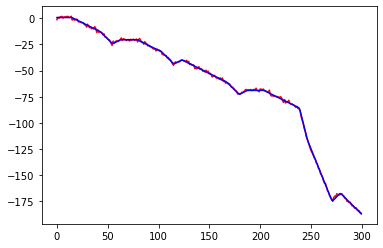

In [6]:
a, b = regression_lineaire(charge, intagreg)
# pour comparer les deux courbes, on transforme les données relartives en absolues
chargeabs = [a * x + b for x in charge]
print(a, b)

plt.plot(temps, chargeabs, color='red')
plt.plot(temps, intagreg, color='blue')
plt.show()

Les deux courbes se superposent : le modèle que nous avons choisi est donc validé.

## Q.4

#### Contraintes

1. Il y a moins de voitures qui chargent que de chargeurs : $\forall  T, N(T) \leqslant n$
1. Toutes les voitures ont effectivement atteint la charge désirée par l'utilisateur lorsqu'il revient la chercher : $\forall  j, e_{j}(t_{j,f}) = e_{j,f} $
1. La loi des noeuds est vérifiée :  $\forall  T, I_{totale}(T) = \sum \limits_{{k=1}}^n I_k(T)$.
1. L'intensité délivrée par chaque borne permet bien d'atteindre l'état final :  $ \forall  j,  e_{j}(t_{j,f}) - e_{j,0} =  \int_{t_{j,0}}^{t_{j,f}} I_k(t) \, \mathrm{d}t$
1. Aucun fil du réseau ne peut supporter une puissance supérieure à  $P_{max}$ : $\forall  T, \forall  k, |P_{k}(T)| \leqslant P_{max} $ i.e. $\forall  T, \forall  k, |I_{k}(T)| \leqslant \frac{P_{max}}{U}$
1. La puissance totale supportée par le réseau ne peut excéder $P_{max}$ : $\forall  T, |P_{totale}(T)| \leqslant P_{max}$ i.e. $\forall  T, |I_{totale}(T)| \leqslant \frac{P_{max}}{U}$

Remarque : on aurait pu changer la contrainte 6 en imposant $\forall  T, \forall  k, 0 \leqslant P_{k}(T)$ de façon à empêcher une voiture de recharger d'autres voitures. Par convention, cela signifie que $\forall  T,  \forall  k,0 \leqslant I_{k}(T)$.

#### Variables de décision

Les variables de décisions sont les $I_k$.

#### Fonction objectif

La fonction à minimiser est $\tilde{p}$ définie à la question 1.